In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
df = pd.read_csv("NetflixOriginals.csv",encoding='latin-1')

In [25]:
def checkDf(dataframe, head=5):
    print("--------------------- Shape ---------------------")
    print(dataframe.shape)
    print("--------------------- Types ---------------------")
    print(dataframe.dtypes)
    print("--------------------- Head ---------------------")
    print(dataframe.head(head))
    print("--------------------- Tail ---------------------")
    print(dataframe.tail(head))
    print("--------------------- MissingValues ---------------------")
    print(dataframe.isnull().sum())

In [26]:
checkDf(df)

--------------------- Shape ---------------------
(584, 6)
--------------------- Types ---------------------
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
--------------------- Head ---------------------
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
--------------------- Tail ---------------------
    

1 - The language were the long-running films created according to the dataset and visualization.

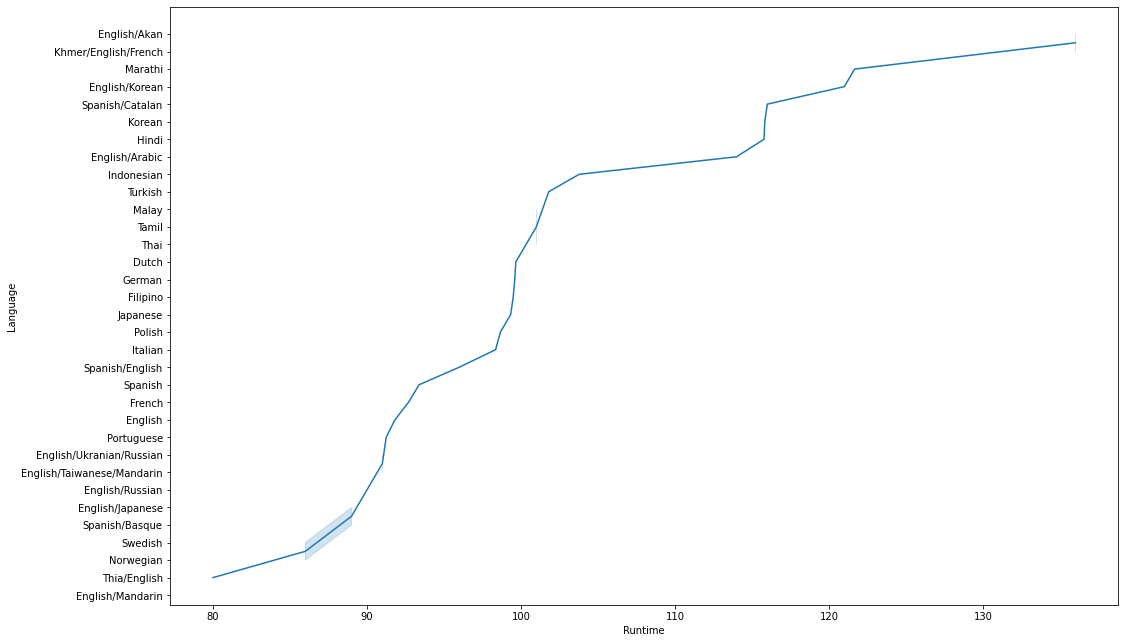

In [27]:
langByRuntime = df.groupby('Language').agg({'Runtime' : 'mean'}).sort_values('Runtime',ascending=False).reset_index()
y = langByRuntime['Language']
x = langByRuntime.loc[(langByRuntime['Runtime'] >= 60)]['Runtime']
plt.figure(figsize=(17,11))
sns.lineplot(x=x,y=y)
plt.show()

2 - Finding the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020 and visualization.

In [28]:
df["Date"] = pd.to_datetime(df.Premiere)
date = df.loc[(df['Genre'] == 'Documentary') & (df['Date'] > '2019-01-31') & (df['Date'] < '2020-06-01')]
dateFig = px.bar(date, x=date['IMDB Score'],y=date.Title,width=900,height=600,color=date['IMDB Score'])
dateFig.show()

3 - Which genre has the highest IMDB rating among movies made in English?

In [29]:
engImdb = df.loc[(df['Language'] == 'English')]
engImdbData = engImdb.sort_values('IMDB Score',ascending=False)
engImdbData[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


4 - What is the average 'runtime' of movies shot in 'Hindi'?

In [30]:
data = df.loc[(df['Language'] == 'Hindi')]
hindMean = data.agg({'Runtime' : 'mean'})
print(f"Average runtime of movies that shoted in Hindi: {hindMean[0]}")

Average runtime of movies that shoted in Hindi: 115.78787878787878


5 - Value Counts of the 'Genre' Column have and what are those categories and visualization.

In [31]:
genre = df['Genre'].value_counts().nlargest(30)
fig = px.bar(genre, x=genre.values, y=genre.index, labels={'index':'Genres','x':'Number of Movies'},width=900,height=600,color=genre.values)
fig.show()

6 - Finding the top 3 used languages in the dataset.

In [32]:
data = df['Language'].value_counts().nlargest(3)
fig = px.bar(data,y=data.values,x=data.index, labels={'y':'Number of Movies','index':'Languages'},width=550,height=350)
fig.show()

7 - Finding top 10 movies that has highest IMDB Score.

In [33]:
data = df.sort_values('IMDB Score',ascending=False)
data = data[0:10]
fig = px.histogram(data,y=data.Title,x=data['IMDB Score'],width=900,height=450)
fig.show()
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


8 - The correlation between IMDB score and 'Runtime' and visualization.

In [34]:
df.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


<AxesSubplot:>

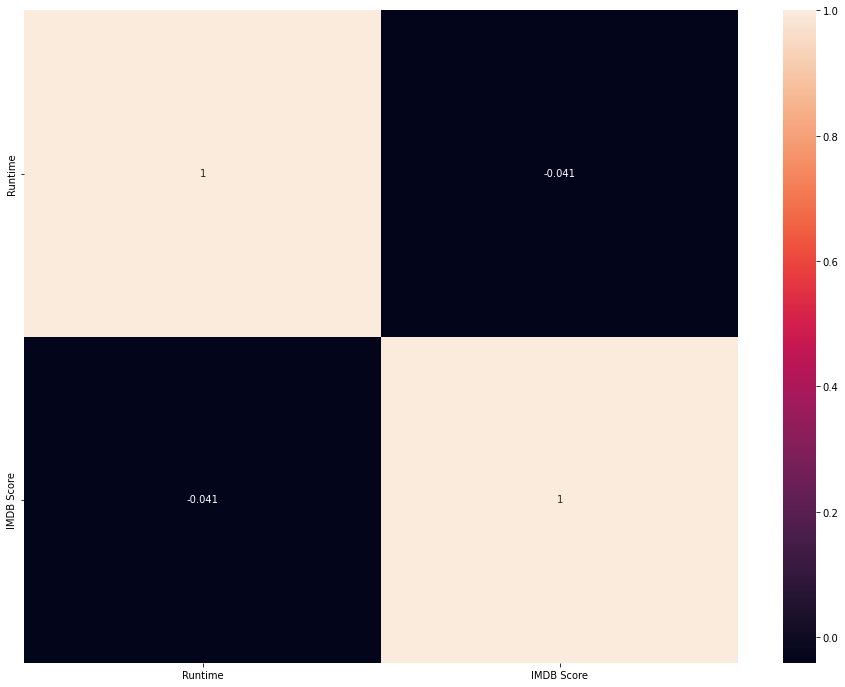

In [35]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

In [36]:
df[['IMDB Score','Runtime']].corr()
fig = px.scatter(df, x='IMDB Score', y='Runtime', width=900, height=600)
fig.show()

9 - The top 10 'Genre's with the highest IMDB Ratings and visualization.

In [37]:
data = df.groupby('Genre').agg({'IMDB Score':'max'}).sort_values('IMDB Score',ascending=False)[0:10].reset_index()
print(data)
fig = px.bar(data,x=data.Genre,y=data['IMDB Score'],width=900,height=600)
fig.show()

                                  Genre  IMDB Score
0                           Documentary         9.0
1                          One-man show         8.5
2                          Concert Film         8.4
3  Animation/Christmas/Comedy/Adventure         8.2
4                                 Drama         7.9
5                     Animation / Short         7.8
6                           Crime drama         7.8
7                       Musical / Short         7.7
8                             Making-of         7.7
9                             War drama         7.7


10 - The top 10 movies with the highest 'Runtime' and visualization.

In [38]:
data = df.sort_values('Runtime',ascending=False).head(10)
print(data)
fig = px.bar(data,x=data.Title,y=data.Runtime,width=900,height=600)
fig.show()

                               Title                  Genre  \
561                     The Irishman            Crime drama   
328                      Da 5 Bloods              War drama   
581          Springsteen on Broadway           One-man show   
247                         Citation                  Drama   
284               The Forest of Love                  Drama   
509                   Raat Akeli Hai               Thriller   
7    The Last Days of American Crime    Heist film/Thriller   
543                             Ludo  Anthology/Dark comedy   
194                 Army of the Dead           Zombie/Heist   
5                              Drive                 Action   

              Premiere  Runtime  IMDB Score  Language       Date  
561  November 27, 2019      209         7.8   English 2019-11-27  
328      June 12, 2020      155         6.5   English 2020-06-12  
581  December 16, 2018      153         8.5   English 2018-12-16  
247   November 6, 2020      151       

11 - Finding the year which is the most movie published.

In [39]:
df["Date"] = pd.to_datetime(df.Premiere).apply(lambda x : x.year)
data = df.groupby('Date').agg({'Title':'count'}).reset_index()
fig = px.line(data,x=data.Date,y=data.Title,width=950,height=500)
fig.show()

12 - The language movies have the lowest average IMDB rating and visualization.

In [40]:
data = df.groupby("Language").agg({"IMDB Score":"mean"}).reset_index().sort_values("IMDB Score")
print('Lowest average for IMDB score by language:')
print(data.head(1))
fig = px.bar(data,x='Language',y='IMDB Score')
fig.show()

Lowest average for IMDB score by language:
   Language  IMDB Score
24    Malay         4.2


13 - Finding the year has the greatest total runtime.

In [41]:
df.groupby('Date').agg({'Runtime' : 'sum'}).sort_values(by='Runtime', ascending=False)[0:1]

,Runtime
Date,
2020,17384


14 - What is the the most used "Genre" of each language?

In [42]:
dLanguage = df.groupby(["Language"])["Genre"].value_counts().groupby(level=0, group_keys=False).head(1).sort_values(ascending=False)
dLanguage

Language                    Genre                
English                     Documentary              120
Hindi                       Drama                     13
Spanish                     Documentary                8
French                      Documentary                6
Portuguese                  Comedy                     6
English/Spanish             Documentary                5
Italian                     Drama                      4
Indonesian                  Drama                      3
Marathi                     Drama                      2
Korean                      Drama                      2
Japanese                    Anime/Science fiction      2
Turkish                     Comedy                     2
English/Hindi               Documentary                2
English/Mandarin            Documentary                2
Norwegian                   Horror                     1
Thia/English                Documentary                1
Thai                        Documentar